# Are Starting Pitchers or Relief Pitchers More Effective?

By Patrick Flannery

## Table of Contents

* Goals
* Loading the Data
* Cleaning the Data
* Getting Acquainted With the Data 
* Creating Visualizations of the Data for Analysis
* Conclusion
* Questions for Further Analysis

## Goals

This notebook contains an analysis on some baseball data. We would like to evaluate the effectiveness of starting pitchers versus relief pitchers based on statistics that are directly attributable to the pitcher. We used three main well-known statistics to make this evaluation:

* ERA - Earned Run Average
* WHIP - Walks plus Hits per Innings Pitched
* SO/9IP - Strikeouts per 9 Innings Pitched


The goal for this project was to do the following:
    
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

In [2]:
# Let's import the modules we'll need for this analysis.

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

## Loading the Data

We downloaded the Pitching.csv file from [Kaggle](https://www.kaggle.com/open-source-sports/baseball-databank?select=Pitching.csv). Then we created two separate CSV files with just starting pitchers (Starters.csv) and just relief pitchers (Relievers.csv). Upon cleaning (explained below) these files, we renamed the Pitching.csv file to AllPitchers.csv before loading it and the other files here:

In [3]:
# Let's load the CSV files and create data frames.

starters = pd.read_csv('Starters.csv')
relievers = pd.read_csv('Relievers.csv')
all_pitchers = pd.read_csv('AllPitchers.csv')

## Cleaning the Data

Prior to loading the files, I deleted some columns that weren't going to be used (Balks, Wild Pitches, Intentional Walks) and or columns that contained a lot of blank information. I also added a couple of columns in which calculations were performed:
 
* GSPct - Used to qualify pitchers into starter or reliever categories
* Type - Starter or reliever?
* WHIP - Walks plus Hits Per Inning Pitched
* SO9IP - Strikeouts per 9 Innings Pitched, used to evaluate pitcher strikeout rates

After leading the cleaned CSV files, I realized I should clean them some more, mainly changing titles of some columns to make more sense.

In [4]:
# Let's rename some of the columns to make more sense.

starters.rename(inplace=True, columns={'playerID':'Player', 'yearID':'Year', 'SorR':'Type','teamID':'Team','lgID':'League', 'stint':'Stint', 'SOPer9IP':'SO9IP'})
relievers.rename(inplace=True, columns={'playerID':'Player', 'yearID':'Year', 'SorR':'Type','teamID':'Team','lgID':'League', 'stint':'Stint', 'SOPer9IP':'SO9IP'})
all_pitchers.rename(inplace=True, columns={'playerID':'Player', 'yearID':'Year', 'SorR':'Type','teamID':'Team','lgID':'League', 'stint':'Stint', 'SOPer9IP':'SO9IP'})

## Getting Acquainted With The Data

Printing the first few rows of the dataframes I loaded to check if I changed the titles properly and to get familiar with the data.

In [5]:
# Checking out the dataframes to see if we're on the right track.

starters.head()

,Player,Year,Type,Stint,Team,League,W,L,G,GS,...,IP,H,ER,HR,BB,WHIP,SO,SO9IP,ERA,R
0,adamsba01,1920,starter,1,PIT,NL,17,13,35,33,...,263.000000,240,63,6,18,0.98,84,2.87,2.16,83
1,bushjo01,1920,starter,1,BOS,AL,15,15,35,32,...,243.666667,287,115,3,94,1.56,88,3.25,4.25,138
2,caldwra02,1920,starter,1,CLE,AL,20,10,34,33,...,237.666667,286,102,9,63,1.47,80,3.03,3.86,135
3,cicoted01,1920,starter,1,CHA,AL,21,10,37,35,...,303.333333,316,110,6,74,1.29,87,2.58,3.26,128
4,covelst01,1920,starter,1,CLE,AL,24,14,41,38,...,315.000000,284,87,6,65,1.11,133,3.80,2.49,110


In [6]:
relievers.head()

,Player,Year,Type,Stint,Team,League,W,L,G,GS,...,IP,H,ER,HR,BB,WHIP,SO,SO9IP,ERA,R
0,burwebi01,1920,reliever,1,SLA,AL,6,4,33,2,...,113.333333,133,46,5,42,1.54,30,2.38,3.65,55
1,enzmajo01,1920,reliever,1,PHI,NL,2,3,16,1,...,58.666667,79,25,1,16,1.62,35,5.37,3.84,40
2,karrbe01,1920,reliever,1,BOS,AL,3,8,26,2,...,91.666667,109,49,3,24,1.45,21,2.06,4.81,55
3,bettshu01,1921,reliever,1,PHI,NL,3,7,32,2,...,100.666667,141,50,8,14,1.54,28,2.50,4.47,65
4,burwebi01,1921,reliever,1,SLA,AL,2,4,33,3,...,84.333333,102,48,2,29,1.55,17,1.81,5.12,62


In [7]:
all_pitchers.head()

,Player,Year,Type,Stint,Team,League,W,L,G,GS,...,IP,H,ER,HR,BB,WHIP,SO,SO9IP,ERA,R
0,adamsba01,1920,starter,1,PIT,NL,17,13,35,33,...,263.000000,240,63,6,18,0.98,84,2.87,2.16,83
1,burwebi01,1920,reliever,1,SLA,AL,6,4,33,2,...,113.333333,133,46,5,42,1.54,30,2.38,3.65,55
2,bushjo01,1920,starter,1,BOS,AL,15,15,35,32,...,243.666667,287,115,3,94,1.56,88,3.25,4.25,138
3,caldwra02,1920,starter,1,CLE,AL,20,10,34,33,...,237.666667,286,102,9,63,1.47,80,3.03,3.86,135
4,cicoted01,1920,starter,1,CHA,AL,21,10,37,35,...,303.333333,316,110,6,74,1.29,87,2.58,3.26,128


In [8]:
# Let's see how many qualifying relievers and starters per team and year there are in this data.

number_of_type = all_pitchers.groupby(['Type', 'Year','Team']).count()
number_of_type.Player

Type      Year  Team
reliever  1920  BOS     1
                PHI     1
                SLA     1
          1921  CHN     1
                NY1     1
                       ..
starter   2015  SLN     5
                TBA     3
                TEX     2
                TOR     3
                WAS     4
Name: Player, Length: 3693, dtype: int64

In [9]:
# Let's see how many total qualifying relievers and starters there are in this dataset.

all_pitchers.groupby('Type').size()

Type
reliever    5283
starter     5463
dtype: int64

In [10]:
# Getting the median ERA and WHIP of starters, relievers, and all pitchers and creating dataframes for each.

median_era = all_pitchers.groupby(['Type','Year']).ERA.median().reset_index()
median_whip = all_pitchers.groupby(['Type','Year']).WHIP.median().reset_index()
starters_median_era = starters.groupby('Year').ERA.median().reset_index()
starters_median_whip = starters.groupby('Year').WHIP.median().reset_index()
relievers_median_era = relievers.groupby('Year').ERA.median().reset_index()
relievers_median_whip = relievers.groupby('Year').WHIP.median().reset_index()

# Checking to see if the dataframes were created properly.

starters_median_era

,Year,ERA
0,1920,3.230
1,1921,3.310
2,1922,3.555
3,1923,3.490
4,1924,3.570
...,...,...
91,2011,3.745
92,2012,3.830
93,2013,3.670
94,2014,3.570


## Creating Visualizations of the Data for Analysis

Creating box plots, violin plots and line plots to evaluate the following statistics over time, between leagues, and/or between pitcher types.

<AxesSubplot:xlabel='Year', ylabel='Player'>

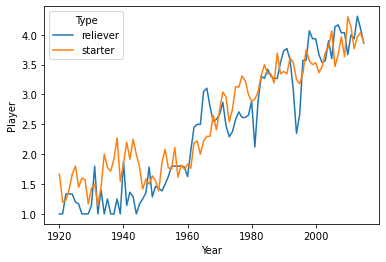

In [11]:
# Creating a lineplot of number of pitchers by type per team over time.

sns.lineplot(data=number_of_type, x='Year', y='Player', hue="Type", ci=None)

Here are some observations of this plot:

* Less qualifying starters and relievers used per team in earlier decades
    * Most particularly less relievers in 1920s
    * Pitching rotations with fewer starters in earlier decades

* Rotations gradually increasing in size over time
* Bullpens also increasing, using more relievers over time
     * Relievers also being used in more specialized roles over time


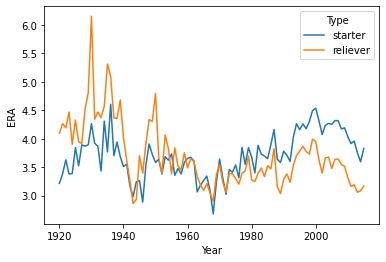

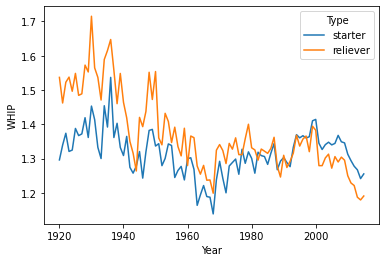

In [12]:
# Creating line plots of ERA and WHIP from 1920-2015.

sns.lineplot(data=all_pitchers, x='Year', y="ERA", hue="Type", ci=None)
plt.show()
plt.clf()
sns.lineplot(data=all_pitchers, x="Year", y="WHIP", hue="Type", ci=None)
plt.show()

Some observations of these plots:

* Starters have better ERA until about 1970
* After 1970, relievers ERA better by ever increasing margin
* Both most effective in late 1960s
    * Bob Gibson of St. Louis with historically low 1.12 ERA in 1968
    * Denny McLain of Detroit last to win at least 30 games in single season (1967)
* Effectiveness decreased with hitter-friendly rule changes in 1969
    * Lowering of pitcher’s mound
    * Decrease of strike zone size
* Starters' WHIP better through 1980s
    * Exception 1940s around World War II era
* WHIP Even throughout 1990s
* Relievers' WHIP increasingly better since 2000

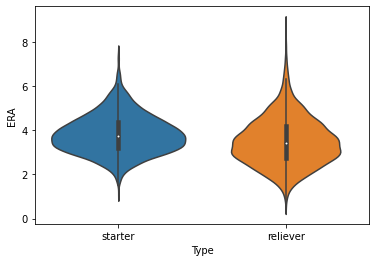

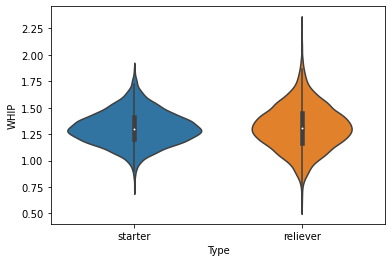

<Figure size 432x288 with 0 Axes>

In [13]:
# Setting up the dataframes with ERA statistics and plotting a violin plot

starters_era = starters["ERA"]
relievers_era = relievers["ERA"]
all_pitchers_era = all_pitchers["ERA"]

sns.violinplot(data=all_pitchers, x="Type", y="ERA")
plt.show()
plt.clf()

# Setting up the dataframes with WHIP statistics and plotting a violin plot

starters_whip = starters["WHIP"]
relievers_whip = relievers["WHIP"]
all_pitchers_whip = all_pitchers["WHIP"]

sns.violinplot(data=all_pitchers, x="Type", y="WHIP")
plt.show()
plt.clf()

Some observations about these violin plots of ERA and WHIP distributions:
* Relievers have lower ERAs overall
    * Median ERA 3.42 vs. starters’ 3.76 ERA
* Both have slight skews of ERA toward lower end
    * Relievers’ skew more pronounced
* Wider range for relievers
    * Possibly due to fewer innings to smooth out exceptionally good or bad games or stints
* WHIP Virtually even for both pitcher types
    * Median WHIP for both about 1.3
* Starters have even distribution with higher peak WHIP around median
    * Relievers slightly skewed toward lower end

In [14]:
# What is the median ERA and WHIP of starters and relievers?

print(np.median(starters.ERA))
print(np.median(relievers.ERA))
print(np.median(starters.WHIP))
print(np.median(relievers.WHIP))

3.76
3.42
1.3
1.31


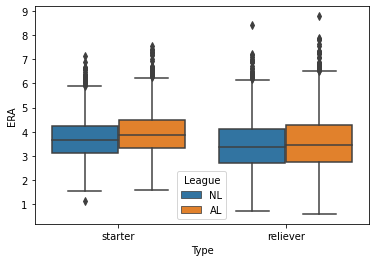

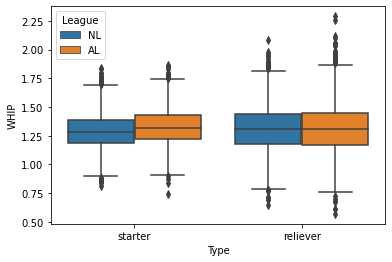

In [15]:
# Creating box plots comparing starters' and relievers' ERA ans WHIP in the National League and American League

sns.boxplot(data=all_pitchers, x="Type", y="ERA", hue="League")
plt.show()
plt.clf()

sns.boxplot(data=all_pitchers, x="Type", y="WHIP", hue="League")
plt.show()

What can we observe from these boxplots?
* NL pitchers better ERA for both types 
    * Low-end outlier Bob Gibson with 1.12 ERA
* Both types and leagues with far more high-end ERA outliers
* NL starters better WHIP than AL starters
* Both leagues’ relievers about equally effective WHIP
    * Wider range for AL relievers
    * AL teams use a better-hitting designated hitter (DH) throughout entire game in lieu of a worse-hitting pitcher.
    * NL teams tend to use pinch hitter in later innings when relief pitchers are used, must otherwise use pitcher to bat.

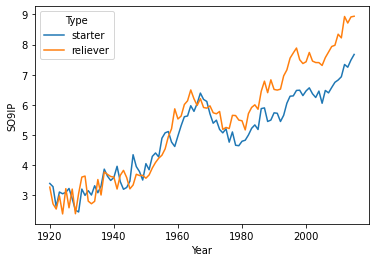

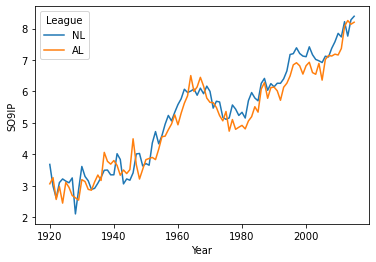

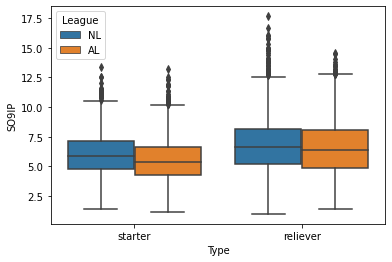

<Figure size 432x288 with 0 Axes>

In [16]:
# Creating line plots of strikeouts per 9 innings per type from 1920-2015.

sns.lineplot(data=all_pitchers, x='Year', y="SO9IP", hue="Type", ci=None)
plt.show()
plt.clf()
# Creating line plots of strikeouts per 9 innings per league from 1920-2015.

sns.lineplot(data=all_pitchers, x='Year', y="SO9IP", hue="League", ci=None)
plt.show()
plt.clf()

# Creating boxplot of strikeouts per 9 innings per type and league.

sns.boxplot(data=all_pitchers, x="Type", y="SO9IP", hue="League")
plt.show()
plt.clf()

Some strikeout observations from these plots:
* Relievers better strikout rate most years since 1950s
* Relievers increasingly better since about 1970
* Starters better in 1920s
* NL pitchers marginally better strikeout rate over time
* NL pitchers striking more batters out than AL pitchers
* Relievers overall better strikeout rate for both leagues
* NL relievers with more high-end outliers

## Conclusion

Here is what I concluded from this analysis:

* Relievers are more effective based on statistics looked at in this analysis
* This may be due to several factors:
    * Out of necessity
        * Must pitch well to remain in major leagues
        * To avoid demotion to minor leagues
    * Desire for promotion to starting pitcher position
    * Have specialized positions and may excel in those positions
        * “Closer”: Finishes games when their team has small lead in order to preserve a win
        * “Setup”: Replaces a starter in later innings and must preserve a lead for the closer
        * When they face a batter who has same dominant hand as the pitcher
        * For a certain amount of time in a game, usually shorter than a starter

## Questions for Further Analysis

* How do various factors and trends affect pitchers’ effectiveness over certain time periods?
    * Stadium dimensions and conditions
    * Rule changes
    * Pitch types and velocities
    * Individual years or decades
* What other statistics, particularly sabermetrics, can be looked at to evaluate pitchers’ effectiveness?
* How do defensive factors affect a pitcher’s effectiveness?
    * Errors, unearned runs, defensive runs saved, etc.